## Análisis exploratorio de la demanda

1-Explorar características de los pacientes.

2-Explorar relaciones entre las características de los pacientes.

3-Explorar consumos. Analizar su distribución

## Importación de librerías

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt


## Carga del dataset

In [44]:
df=pd.read_csv('.\Data\Dataset_demanda.csv',sep=';')
df.head(2)

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,Q consumos Clinica Medica,Q consumos pediatria,Q consumos nutricionistas,Promedio calificaciones enviadas
0,100000,81,F,69,Titular,a,individuo_tipo_1,SI,2,0,0,"6,5"
1,100001,64,F,77,Titular,b,empresa_tipo_1,SI,1,0,0,8


In [107]:
df.rename(columns={'Q consumos pediatria':'consumos_pediatria', 'Q consumos Clinica Medica':'consumos_clinica','Q consumos nutricionistas':
                  'consumos_nutricionista','Promedio calificaciones enviadas':'calificaciones_enviadas_promedio'},inplace=True)

In [113]:
df['calificaciones_enviadas_promedio']=df['calificaciones_enviadas_promedio'].str.replace(',', '.').astype(float)

## Análisis exploratorio general

In [46]:
df.describe()

,id_socio_encoded,edad_encoded,antiguedad_encoded,consumos_clinica,consumos_pediatria,consumos_nutricionista
count,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000
mean,100961.500000,31.917360,29.399688,0.541060,0.322765,0.435551
std,555.555278,20.189223,21.565892,0.673299,0.648436,0.825683
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100480.750000,15.000000,11.000000,0.000000,0.000000,0.000000
50%,100961.500000,31.000000,25.000000,0.000000,0.000000,0.000000
75%,101442.250000,47.000000,44.000000,1.000000,1.000000,1.000000
max,101923.000000,85.000000,130.000000,5.000000,5.000000,7.000000


In [47]:
df.isnull().sum()

id_socio_encoded                    0
edad_encoded                        0
sexo_encoded                        0
antiguedad_encoded                  0
parentesco_encoded                  0
plan_encoded                        0
segmento_encoded                    0
app_descargada_encoded              0
consumos_clinica                    0
consumos_pediatria                  0
consumos_nutricionista              0
Promedio calificaciones enviadas    0
dtype: int64

In [48]:
df[df.id_socio_encoded.duplicated()]

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,consumos_clinica,consumos_pediatria,consumos_nutricionista,Promedio calificaciones enviadas


### 1 Análisis de pacientes

#### Sexo

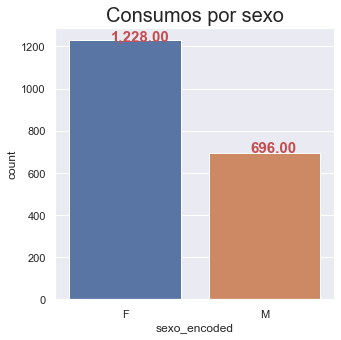

In [68]:
sns.set()

plt.figure(figsize=(5,5))

ax=sns.countplot(data=df,x='sexo_encoded')

plt.title('Consumos por sexo',fontsize=20)

for p in ax.patches:
    valores='{:,.2f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.5
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=15,color='r',weight='bold')

plt.show()

La muestra seleccionada contiene casi un 50% mas de mujeres que de hombres.

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


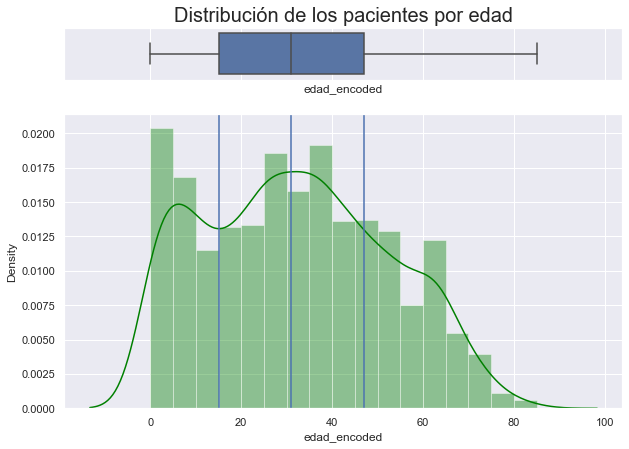

In [52]:
sns.set()

#Se divide el gráfico en dos partes

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df.edad_encoded, ax=ax_box)
sns.distplot(df.edad_encoded, ax=ax_hist, kde=False, hist=False)
sns.distplot(df.edad_encoded, ax=ax_hist, kde=True, hist=True,norm_hist=False,color="green")

plt.axvline(df.edad_encoded.quantile(0.25))
plt.axvline(df.edad_encoded.quantile(0.50))
plt.axvline(df.edad_encoded.quantile(0.75))
 
ax_box.set_title("Distribución de los pacientes por edad", fontsize=20)
plt.show()


El grupo de pacientes entre 0 y 5 años es el mas numeroso, para luego descender e incrementarse en los pacientes de mediana edad (25-50 años) y desciende progresivamente a medida que aumenta la edad.

In [8]:
pd.DataFrame(df.edad_encoded.describe())

,edad_encoded
count,1924.000000
mean,31.917360
std,20.189223
min,0.000000
25%,15.000000
50%,31.000000
75%,47.000000
max,85.000000


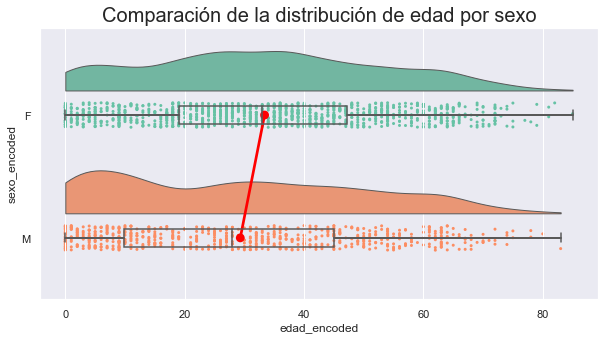

In [9]:
plt.figure(figsize=(10,5))

ax=pt.RainCloud(x = 'sexo_encoded', y = 'edad_encoded',orient='h', data = df, pointplot = True)

plt.title("Comparación de la distribución de edad por sexo",fontsize=20)

plt.show()

El promedio de edad es mayor para las mujeres que para los hombres. Asimismo hay un mayor número de pacientes pediatricos masculinos que femeninos, mientras que en el grupo de personas de mediana edad, es mas predominante el sexo femenino.

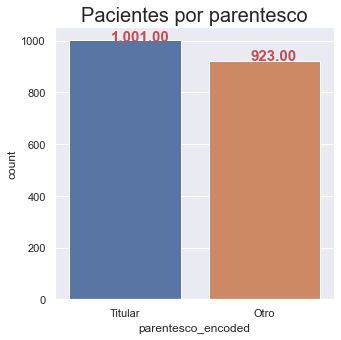

In [67]:
sns.set()

plt.figure(figsize=(5,5))

ax=sns.countplot(data=df,x='parentesco_encoded')

plt.title('Pacientes por parentesco',fontsize=20)

for p in ax.patches:
    valores='{:,.2f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.5
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=15,color='r',weight='bold')

plt.show()

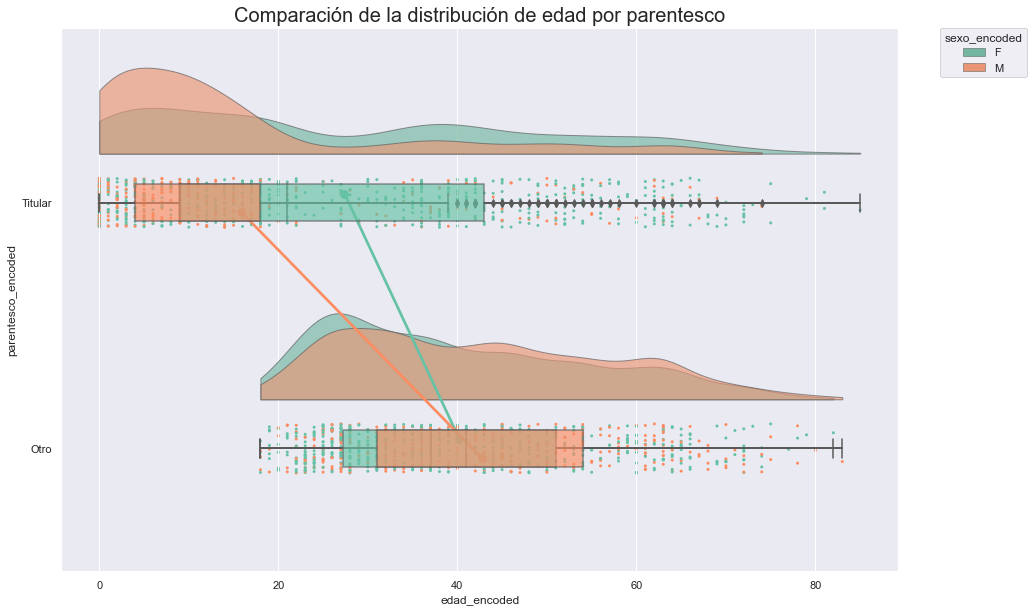

In [71]:
plt.figure(figsize=(15,10))

ax=pt.RainCloud(x = 'parentesco_encoded', y = 'edad_encoded',orient='h', data = df, pointplot = True,hue='sexo_encoded',alpha = .65)

plt.title("Comparación de la distribución de edad por parentesco",fontsize=20)

plt.show()

No existe una diferencia significativa entre la cantidad de pacientes de ambos grupos pero si se ve que el grupo "Otros" esta compuesto por pacientes adolescentes, adultos y mayores. La mayor parte de los titulares son pediatricos de sexo masculino.

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


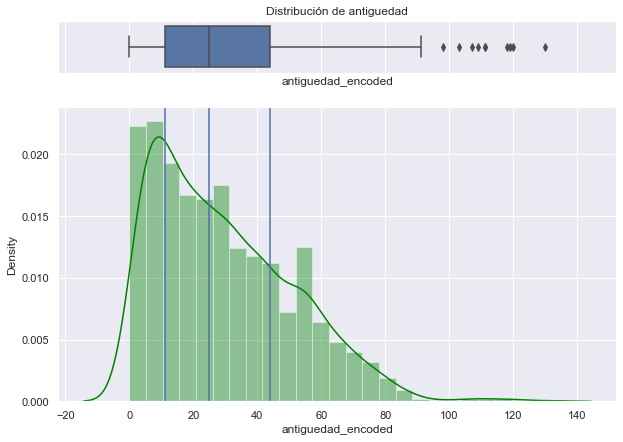

In [89]:
sns.set()

#Se divide el gráfico en dos partes

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df.antiguedad_encoded, ax=ax_box)
sns.distplot(df.antiguedad_encoded, ax=ax_hist, kde=False, hist=False)
sns.distplot(df.antiguedad_encoded, ax=ax_hist, kde=True, hist=True,norm_hist=False,color="green")

plt.axvline(df.antiguedad_encoded.quantile(0.25))
plt.axvline(df.antiguedad_encoded.quantile(0.50))
plt.axvline(df.antiguedad_encoded.quantile(0.75))
 
ax_box.set_title("Distribución de antiguedad")
plt.show()

Preguntar en que consiste la variable

### 2 Relación de pacientes con características

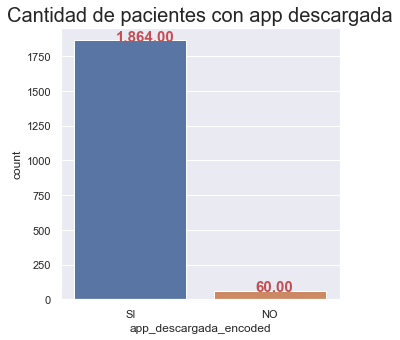

In [69]:
sns.set()

plt.figure(figsize=(5,5))

ax=sns.countplot(data=df,x='app_descargada_encoded')

plt.title('Cantidad de pacientes con app descargada',fontsize=20)

for p in ax.patches:
    valores='{:,.2f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.5
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=15,color='r',weight='bold')

plt.show()

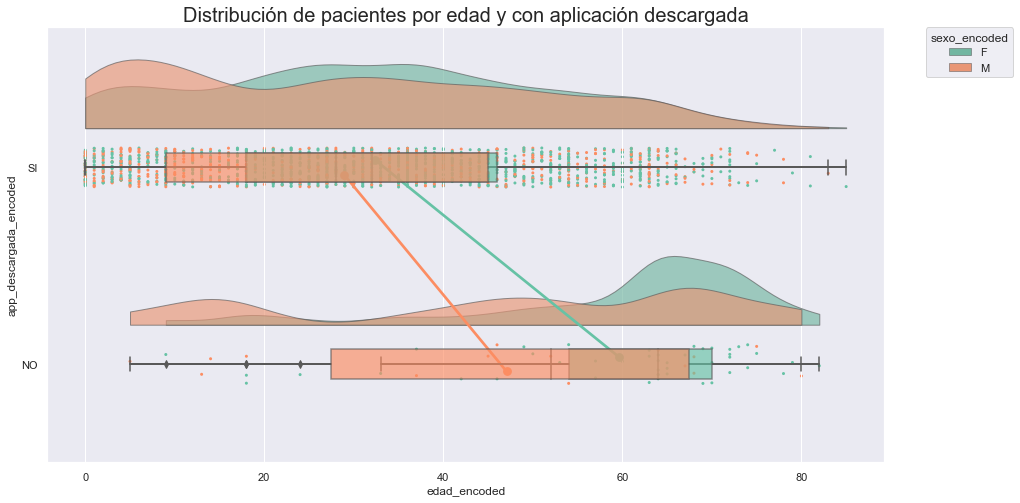

In [78]:
plt.figure(figsize=(15,8))

ax=pt.RainCloud(data=df,y='edad_encoded',x='app_descargada_encoded',hue='sexo_encoded',orient='h',pointplot = True,alpha = .65)

plt.title("Distribución de pacientes por edad y con aplicación descargada",fontsize=20)

plt.show()

Efectivamente existe un grupo muy pequeño de pacientes (60) que no han descargado la aplicación.  El grupo predominante es el sexo femenino de mayor edad.

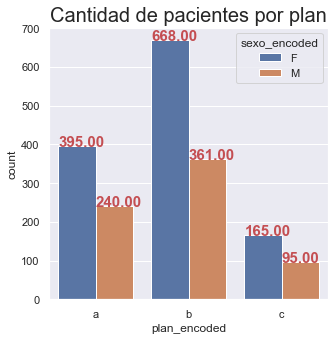

In [81]:
sns.set()

plt.figure(figsize=(5,5))

ax=sns.countplot(data=df,x='plan_encoded',hue='sexo_encoded')

plt.title('Cantidad de pacientes por plan',fontsize=20)

for p in ax.patches:
    valores='{:,.2f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.4
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=15,color='r',weight='bold')

plt.show()

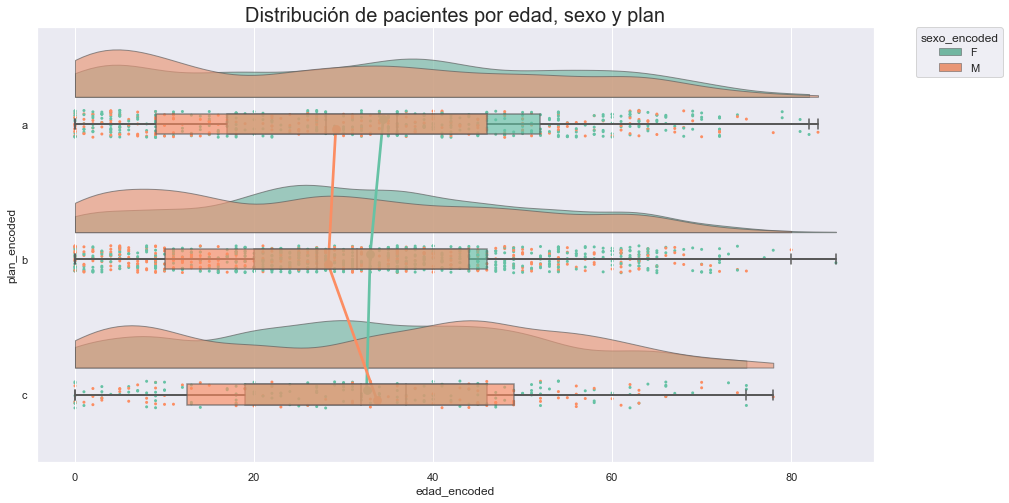

In [75]:
plt.figure(figsize=(15,8))

ax=pt.RainCloud(data=df,y='edad_encoded',x='plan_encoded',hue='sexo_encoded',orient='h',pointplot = True,alpha = .65)

plt.title("Distribución de pacientes por edad, sexo y plan",fontsize=20)

plt.show()

Hay una mayor cantidad de pacientes con el plan "b" y la que menor cantidad de afiliados tiene es la "c" (¿será mas costosa?). No se observan diferencias en la proporcion por sexo.

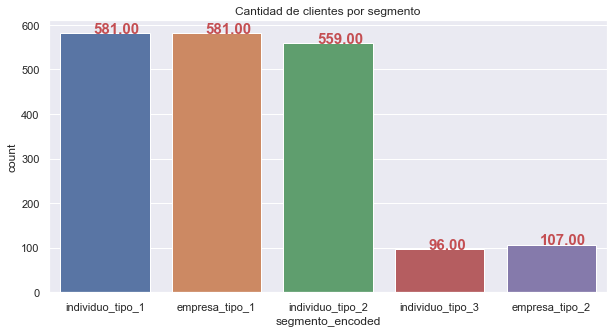

In [93]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='segmento_encoded')

plt.title("Cantidad de clientes por segmento")

for p in ax.patches:
    valores='{:,.2f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.5
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=15,color='r',weight='bold')


plt.show()

Hay una menor cantidad de registros para los segmentos individuo_tipo_3 y empresa_tipo_2

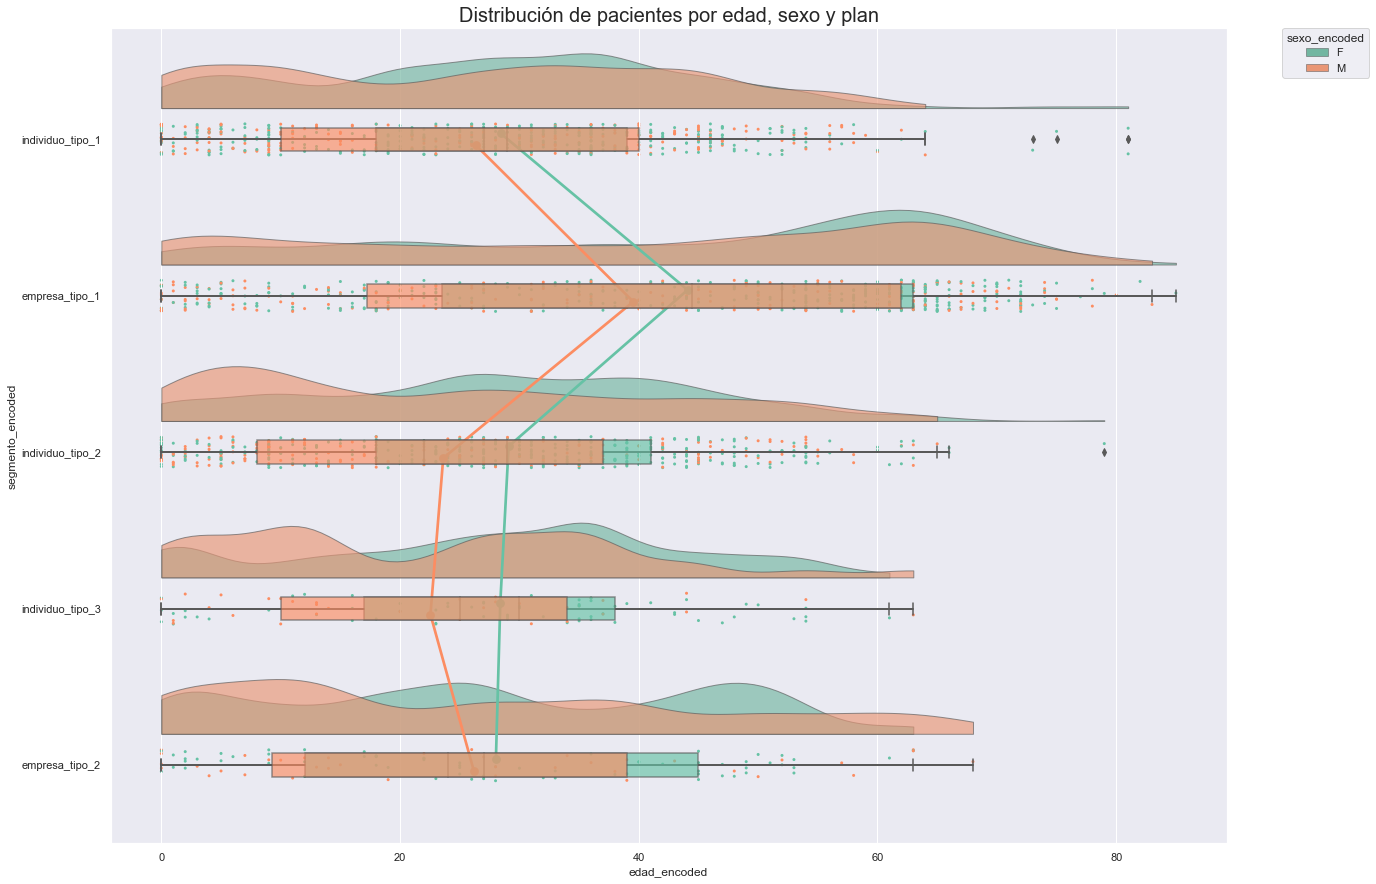

In [95]:
plt.figure(figsize=(20,15))

ax=pt.RainCloud(data=df,y='edad_encoded',x='segmento_encoded',hue='sexo_encoded',orient='h',pointplot = True,alpha = .65)

plt.title("Distribución de pacientes por edad, sexo y segmento",fontsize=20)

plt.show()

El grupo de pacientes de mayor edad se localiza en el grupo empresa_tipo_1. En el resto de segmentos no hay diferencias significativas por sexo y edad.

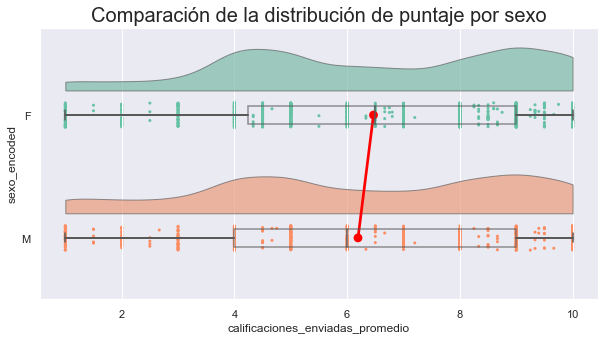

In [125]:
plt.figure(figsize=(10,5))

ax=pt.RainCloud(y = 'calificaciones_enviadas_promedio', x = 'sexo_encoded',orient='h', data = df, pointplot = True,alpha = .65)

plt.title("Comparación de la distribución de puntaje por sexo",fontsize=20)

plt.show()

Se podría dividir el puntaje en segmentos: malo-bueno-muy bueno. No hay variaciones significativas en el puntaje por el sexo

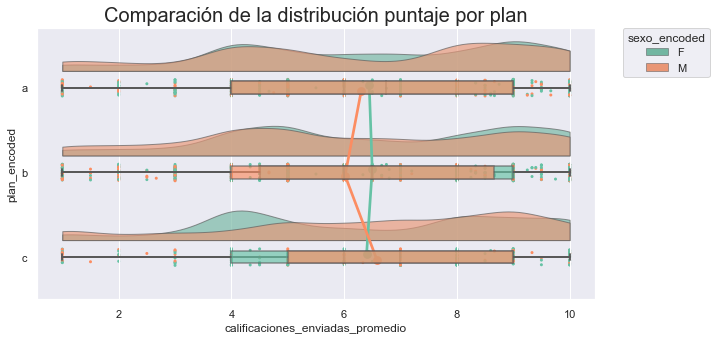

In [127]:
plt.figure(figsize=(10,5))

ax=pt.RainCloud(y = 'calificaciones_enviadas_promedio', x = 'plan_encoded',orient='h', data = df, pointplot = True,alpha = .65,hue='sexo_encoded')

plt.title("Comparación de la distribución puntaje por plan",fontsize=20)

plt.show()

No hay variaciones significativas por plan. El promedio de calificaciones es mas o menos el mismo.

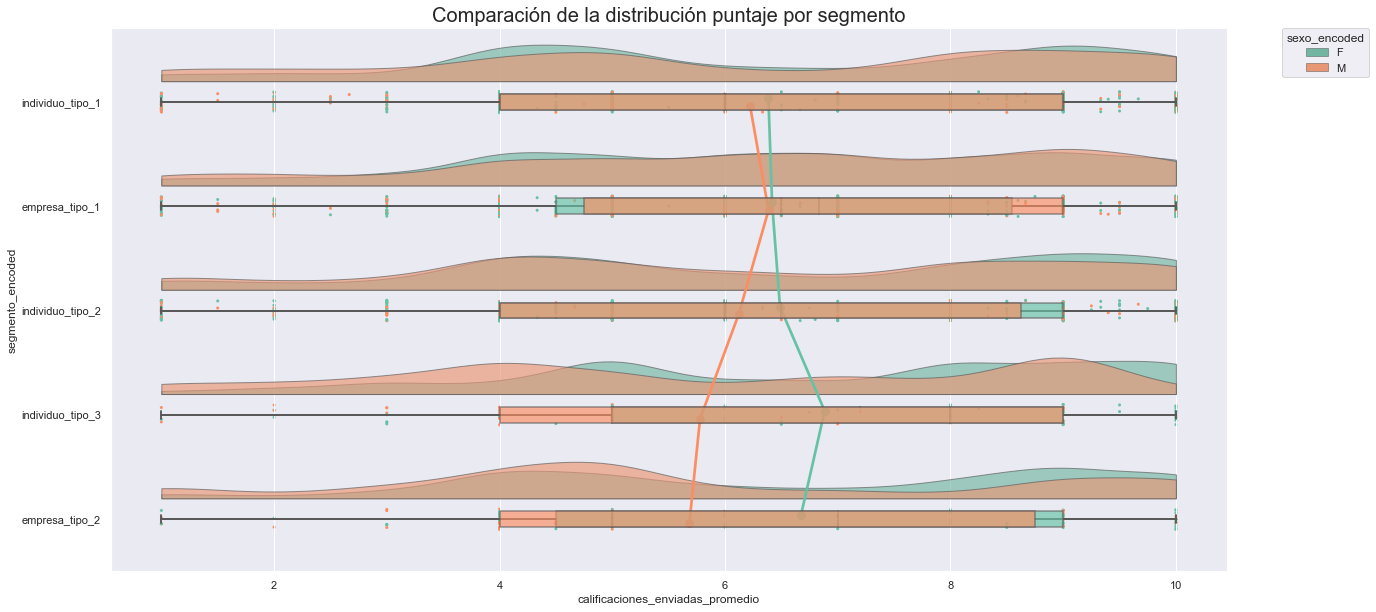

In [130]:
plt.figure(figsize=(20,10))

ax=pt.RainCloud(y = 'calificaciones_enviadas_promedio', x = 'segmento_encoded',orient='h', data = df, pointplot = True,alpha = .65,hue='sexo_encoded')

plt.title("Comparación de la distribución puntaje por segmento",fontsize=20)

plt.show()

### 3 -Consumos

In [131]:
df.head(2)

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,consumos_clinica,consumos_pediatria,consumos_nutricionista,calificaciones_enviadas_promedio
0,100000,81,F,69,Titular,a,individuo_tipo_1,SI,2,0,0,6.5
1,100001,64,F,77,Titular,b,empresa_tipo_1,SI,1,0,0,8.0


In [132]:
df_clinica=df.loc[df.index.repeat(df.consumos_clinica)].reset_index(drop=True)
df_clinica.consumos_clinica='clinica'

df_pediatria=df.loc[df.index.repeat(df.consumos_pediatria)].reset_index(drop=True)
df_pediatria.consumos_pediatria='pediatria'

df_nutricionista=df.loc[df.index.repeat(df.consumos_nutricionista)].reset_index(drop=True)
df_nutricionista.consumos_nutricionista='nutricionista'

df_nuevo=pd.concat([df_clinica,df_pediatria,df_nutricionista],axis=0).reset_index(drop=True)

In [133]:
df_nuevo.head(3)

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,consumos_clinica,consumos_pediatria,consumos_nutricionista,calificaciones_enviadas_promedio
0,100000,81,F,69,Titular,a,individuo_tipo_1,SI,clinica,0,0,6.5
1,100000,81,F,69,Titular,a,individuo_tipo_1,SI,clinica,0,0,6.5
2,100001,64,F,77,Titular,b,empresa_tipo_1,SI,clinica,0,0,8.0


In [134]:
df_nuevo['consumos']=df_nuevo.consumos_clinica.astype(str)+df_nuevo.consumos_nutricionista.astype(str)+df_nuevo.consumos_pediatria.astype(str)
df_nuevo.consumos=np.where(df_nuevo.consumos=='clinica00','clinica',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='clinica10','clinica',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='pediatria00','pediatria',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='00pediatria','pediatria',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='clinica00','nutricionista',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='0nutricionista0','nutricionista',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='1nutricionista0','nutricionista',df_nuevo.consumos)

df_nuevo.drop(['consumos_clinica','consumos_pediatria','consumos_nutricionista'],axis=1,inplace=True)

In [135]:
df.consumos_clinica.sum()+df.consumos_pediatria.sum()+df.consumos_nutricionista.sum()

2500

In [136]:
df_nuevo.shape

(2500, 10)

In [137]:
df_nuevo.sort_values(by='id_socio_encoded',inplace=True)
df_nuevo.head()

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,calificaciones_enviadas_promedio,consumos
0,100000,81,F,69,Titular,a,individuo_tipo_1,SI,6.5,clinica
1,100000,81,F,69,Titular,a,individuo_tipo_1,SI,6.5,clinica
2,100001,64,F,77,Titular,b,empresa_tipo_1,SI,8.0,clinica
3,100002,60,F,76,Otro,b,empresa_tipo_1,NO,7.0,clinica
4,100003,49,F,78,Titular,c,empresa_tipo_1,SI,9.0,clinica


In [138]:
df[(df.consumos_nutricionista>=1) & (df.consumos_clinica>=1)]

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,consumos_clinica,consumos_pediatria,consumos_nutricionista,calificaciones_enviadas_promedio
215,100215,29,F,0,Titular,c,individuo_tipo_2,SI,1,0,1,6.5
262,100262,35,F,16,Otro,a,individuo_tipo_1,SI,1,0,1,6.5
296,100296,36,F,8,Titular,b,individuo_tipo_1,SI,1,0,1,5.5
989,100989,40,F,32,Otro,b,empresa_tipo_2,SI,1,0,1,5.0
1168,101168,23,M,1,Otro,b,empresa_tipo_1,SI,1,0,1,2.5


In [139]:
df_nuevo[df_nuevo.id_socio_encoded==100296]

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,calificaciones_enviadas_promedio,consumos
154,100296,36,F,8,Titular,b,individuo_tipo_1,SI,5.5,clinica
1766,100296,36,F,8,Titular,b,individuo_tipo_1,SI,5.5,nutricionista


In [143]:
df_nuevo.columns

Index(['id_socio_encoded', 'edad_encoded', 'sexo_encoded',
       'antiguedad_encoded', 'parentesco_encoded', 'plan_encoded',
       'segmento_encoded', 'app_descargada_encoded',
       'calificaciones_enviadas_promedio', 'consumos'],
      dtype='object')

In [144]:
df_nuevo.consumos.dtype

dtype('O')

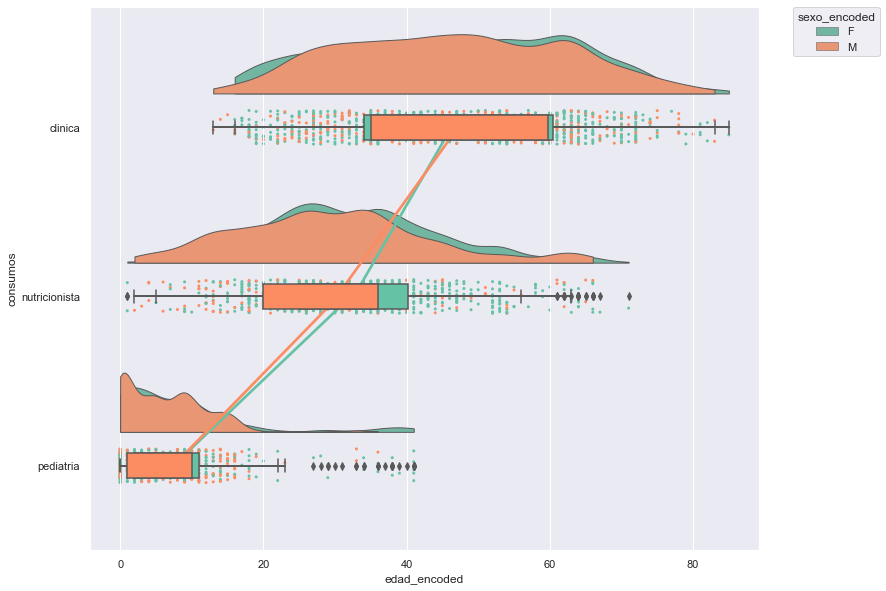

In [145]:
plt.figure(figsize=(12,10))

ax=pt.RainCloud(data=df_nuevo,y='edad_encoded',x='consumos',hue='sexo_encoded',orient='h',pointplot = True)

plt.show()

Hay claramente tres grupos de edad por tipo de consumo. Los consumos en clínica médica arrancan a partir de los 13 años. Los de nutricionista son mayores en los adolescentes y mayores de mediana edad. Mientras que los consumos en pediatria se dan hasta los 20 años-

In [149]:
df_nuevo[df_nuevo.consumos=='clinica'].edad_encoded.min()

13

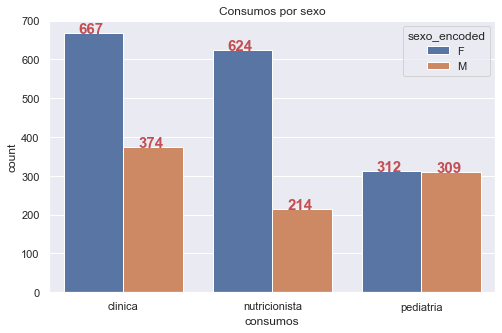

In [154]:
plt.figure(figsize=(8,5))

ax=sns.countplot(data=df_nuevo,x='consumos',hue='sexo_encoded')

plt.title('Consumos por sexo')

for p in ax.patches:
    valores='{:,.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.3
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=15,color='r',weight='bold')

plt.show()

Claramente hay una diferencia en el consumo por sexo, pero esto puede darse debido a la diferencia en la propocion de registros por sexo que se tiene en el dataset.

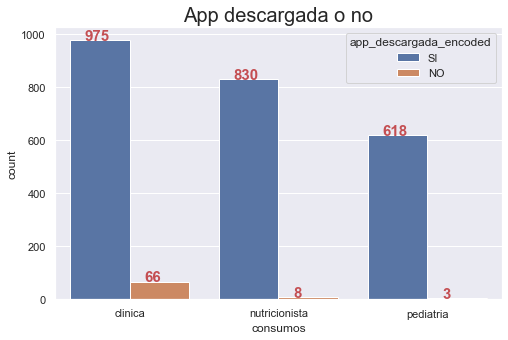

In [155]:
plt.figure(figsize=(8,5))

ax=sns.countplot(data=df_nuevo,x='consumos',hue='app_descargada_encoded')

plt.title('App descargada o no',fontsize=20)

for p in ax.patches:
    valores='{:,.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.3
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=15,color='r',weight='bold')

plt.show()

Los consumos en pediatría y nutricionista se hacen siempre por aplicación.

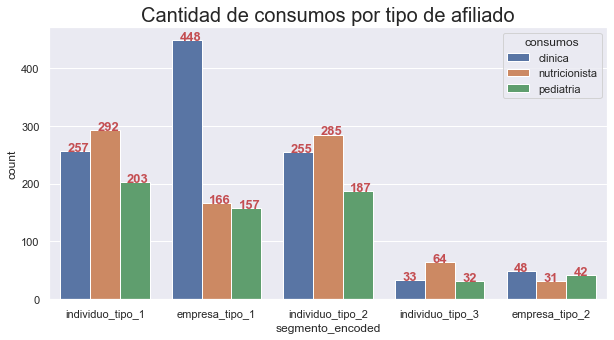

In [161]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_nuevo,x='segmento_encoded',hue='consumos')

plt.title("Cantidad de consumos por tipo de afiliado",fontsize=20)

for p in ax.patches:
    valores='{:,.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.2
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=13,color='r',weight='bold')

plt.show()

Se observa que el segmento empresa_tipo1 es el que realiza mas consumos en clínica médica.A su vez, los grupos individuo_tipo_1 y tipo_2 tienen mas consumos en nutricionista.